# mnist 데이터셋 불러오기

5


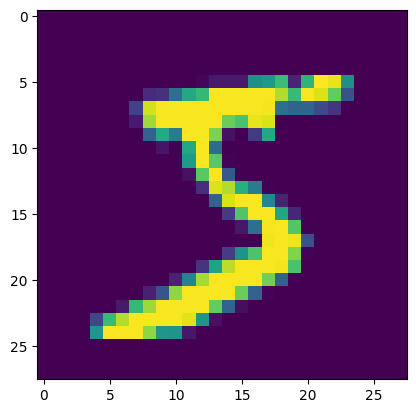

In [47]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.imshow(x_train[0])
print(y_train[0])

In [48]:
x_train[0].shape

(28, 28)

In [49]:
x_train, x_test = x_train/255, x_test/255

## 모델 설정
- dropout : 기울기 소실 문제 해결하지만 dropout 하지 않는 것보다 시간 더 오래 거림
- dropout 하지 않는 경우에는 전체 weight, bias 값을 한 번에 업데이트 시키기 때문
- dropout 하는 경우에는 여러 번 작업을 하며 weight, bias 값을 업데이트 시키기 때문에 시간이 오래 걸림
- dropout 실행해 한 번 안쓴 노드는 계속해서 안쓰는 것이 아니라 다음 번에 사용하면서 모든 노드의 weight, bias 값 업데이트 해 줌

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

model = Sequential()
model.add(Flatten(input_shape=(28,28))) # 1차원 배열로 만들어주는 작업 (28X28 -> 784 columns로)
model.add(Dense(512, activation='relu')) # 위의 작업으로 자동으로 input_dim 결정됨 -> 따로 지정안해줘도 됨 
model.add(Dropout(0.2)) 
model.add(Dense(10, activation='softmax')) # 0 ~ 9 숫자를 가지므로 출력층의 층 수 10개 / 다중 분류로 'softmax' 사용

In [51]:
# sparse_categorical_crossentropy를 사용함으로써 label 값을 원핫인코딩 안해줘도 됨

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [52]:
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2207 - accuracy: 0.9353
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0966 - accuracy: 0.9706
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0677 - accuracy: 0.9786
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0525 - accuracy: 0.9829
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.0681 - accuracy: 0.9807


[0.0681210458278656, 0.9807000160217285]

## 모델 예측 

In [53]:
model.predict(x_test)[9] # 가장 확률값 높은 것으로 예측 된 것

313/313 [==============================] - 0s 1ms/step


array([6.9547579e-10, 1.2444963e-13, 5.1416721e-10, 1.1359770e-07,
       2.6182486e-03, 8.3097689e-09, 1.3682492e-09, 5.4438104e-04,
       1.1357946e-04, 9.9672371e-01], dtype=float32)

In [54]:
y_test[9]

9

# 이미지 인식_CDN

## mnist 데이터셋 불러오기

In [55]:
from keras.datasets import mnist
from keras.utils import np_utils

import numpy as np
import sys

from tensorflow.random import set_seed

seed = 0
np.random.seed(seed)
set_seed(3)

In [56]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## 픽셀로 데이터 확인
- 28X28 -> 총 784개 픽셀로 이루어져 있음
- 픽셀은 밝기 정도에 따라 0부터 255까지의 등급을 매김
- 784개 속성을 이용해 10개 클래스를 맞히는 문제

In [57]:
for x in x_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


## reshape
- 28X28의 2차원 데이터를 784개의 1차원 데이터로 변환

In [58]:
x_train = x_train.reshape(x_train.shape[0], 784)

## 데이터 정규화

In [59]:
x_train = x_train.astype('float64')
x_train = x_train / 255

x_test = x_test.reshape(x_test.shape[0], 784).astype('float64') / 255

## 원핫인코딩 작업

In [60]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

## 모델 설정

In [61]:
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu')) # 위에서 이미 1차원으로 변환했기에 Flatten 작업 X
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [62]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## 모델 저장, 모델 최적화 단계에서 학습 자동 중단 설정

In [63]:
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [64]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

## 모델 실행

In [65]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpointer])


Epoch 1: val_loss improved from inf to 0.15590, saving model to ./model\01-0.1559.hdf5

Epoch 2: val_loss improved from 0.15590 to 0.10949, saving model to ./model\02-0.1095.hdf5

Epoch 3: val_loss improved from 0.10949 to 0.09438, saving model to ./model\03-0.0944.hdf5

Epoch 4: val_loss improved from 0.09438 to 0.07660, saving model to ./model\04-0.0766.hdf5

Epoch 5: val_loss improved from 0.07660 to 0.07157, saving model to ./model\05-0.0716.hdf5

Epoch 6: val_loss improved from 0.07157 to 0.06425, saving model to ./model\06-0.0642.hdf5

Epoch 7: val_loss did not improve from 0.06425

Epoch 8: val_loss improved from 0.06425 to 0.06293, saving model to ./model\08-0.0629.hdf5

Epoch 9: val_loss improved from 0.06293 to 0.06070, saving model to ./model\09-0.0607.hdf5

Epoch 10: val_loss improved from 0.06070 to 0.05684, saving model to ./model\10-0.0568.hdf5

Epoch 11: val_loss did not improve from 0.05684

Epoch 12: val_loss did not improve from 0.05684

Epoch 13: val_loss did not i

## 모델 실행 과정 그래프로 확인

In [66]:
y_vloss = history.history['val_loss'] # 테스트셋의 오차
y_loss = history.history['loss'] # 학습셋의 오차

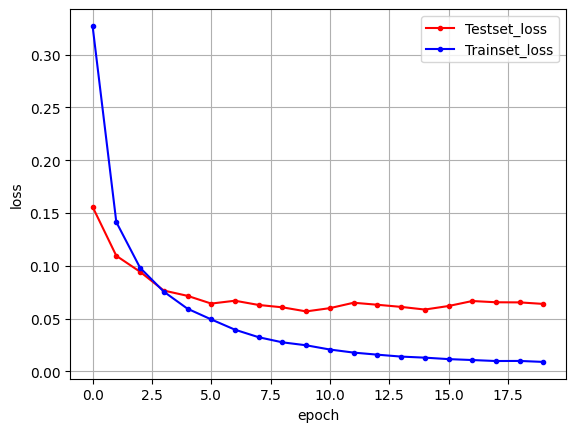

In [67]:
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()